<a href="https://colab.research.google.com/github/Ali-Fartout/Kaggle/blob/main/Predict_Future_Sales/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirement

## Kaggle config. and download dataset.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/"

In [ ]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

competitive-data-science-predict-future-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extract data

In [ ]:
import zipfile
with zipfile.ZipFile('/content/gdrive/MyDrive/competitive-data-science-predict-future-sales.zip', 'r') as zip_ref:
    zip_ref.extractall("/content/Data")

# EDA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Train
train_shop_data = pd.read_csv("/content/Data/shops.csv")
train_item_data = pd.read_csv('/content/Data/items.csv')
train_cat_data = pd.read_csv('/content/Data/item_categories.csv')
train_sales_data = pd.read_csv('/content/Data/sales_train.csv')

# Test
test_data = pd.read_csv('/content/Data/test.csv')
submission = pd.read_csv('/content/Data/sample_submission.csv')

In [ ]:
train_shop_data.sample(5)

,shop_name,shop_id
57,"Якутск Орджоникидзе, 56",57
59,"Ярославль ТЦ ""Альтаир""",59
29,"Москва ТЦ ""Новый век"" (Новокосино)",29
48,"Томск ТРЦ ""Изумрудный Город""",48
8,"Воронеж ТРЦ Сити-Парк ""Град""",8


In [ ]:
train_sales_data.sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
649349,05.07.2013,6,31,10991,399.0,1.0
2583547,26.04.2015,27,47,6095,698.0,1.0
2181579,18.11.2014,22,38,9396,299.0,1.0
2300927,31.12.2014,23,56,3341,1999.0,2.0
2406379,12.01.2015,24,54,20611,2249.0,1.0


In [ ]:
train_item_data.sample(5)

,item_name,item_id,item_category_id
20981,Футболка Assassin's Creed Assassin черная S,20981,61
15956,Навител. Навигационная система с пакетом карт ...,15956,76
4514,MADONNA MDNA World Tour 2CD+DVD (фирм.),4514,56
18160,САМЫЙ ДЛИННЫЙ ДЕНЬ (ХХпромо №4_10),18160,40
7493,V/A Trance Essentials 2015 1 2CD (digipack),7493,55


In [ ]:
train_cat_data.sample(5)

,item_category_name,item_category_id
76,Программы - Для дома и офиса (Цифра),76
79,Служебные,79
50,Книги - Открытки,50
23,Игры - XBOX 360,23
35,Карты оплаты - PSN,35


In [ ]:
train_data = train_sales_data.join(train_shop_data.set_index("shop_id"),on="shop_id").join(train_item_data.set_index("item_id"),on="item_id").join(train_cat_data.set_index("item_category_id"),on="item_category_id")

In [ ]:
train_data.sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
1939824,24.08.2014,19,31,10645,550.0,1.0,"Москва ТЦ ""Семеновский""",Головоломка Ключи II**/Cast Key II**,67,Подарки - Развитие
1753860,30.06.2014,17,49,19602,149.0,1.0,"Тюмень ТРЦ ""Кристалл""",ТАЧКИ 2 (регион),40,Кино - DVD
1672649,27.05.2014,16,50,11010,199.0,1.0,"Тюмень ТЦ ""Гудвин""",ДЖИГАН Музыка жизни,55,Музыка - CD локального производства
1439826,10.02.2014,13,44,16642,549.0,1.0,"Самара ТЦ ""Мелодия""",ОСТРОВ ВЕЗЕНИЯ (BD),37,Кино - Blu-Ray
401813,20.04.2013,3,57,10404,399.0,2.0,"Якутск Орджоникидзе, 56",ГЛАДИАТОРЫ РИМА,40,Кино - DVD


In [ ]:
test_data.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
submission.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   shop_name           object 
 7   item_name           object 
 8   item_category_id    int64  
 9   item_category_name  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB


In [ ]:
train_data.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2935849,2935849,2935849,2935849,2935849,2935849
mean,15,33,10197,891,1,40
std,9,16,6324,1730,3,17
min,0,0,0,-1,-22,0
25%,7,22,4476,249,1,28
50%,14,31,9343,399,1,40
75%,23,47,15684,999,1,55
max,33,59,22169,307980,2169,83


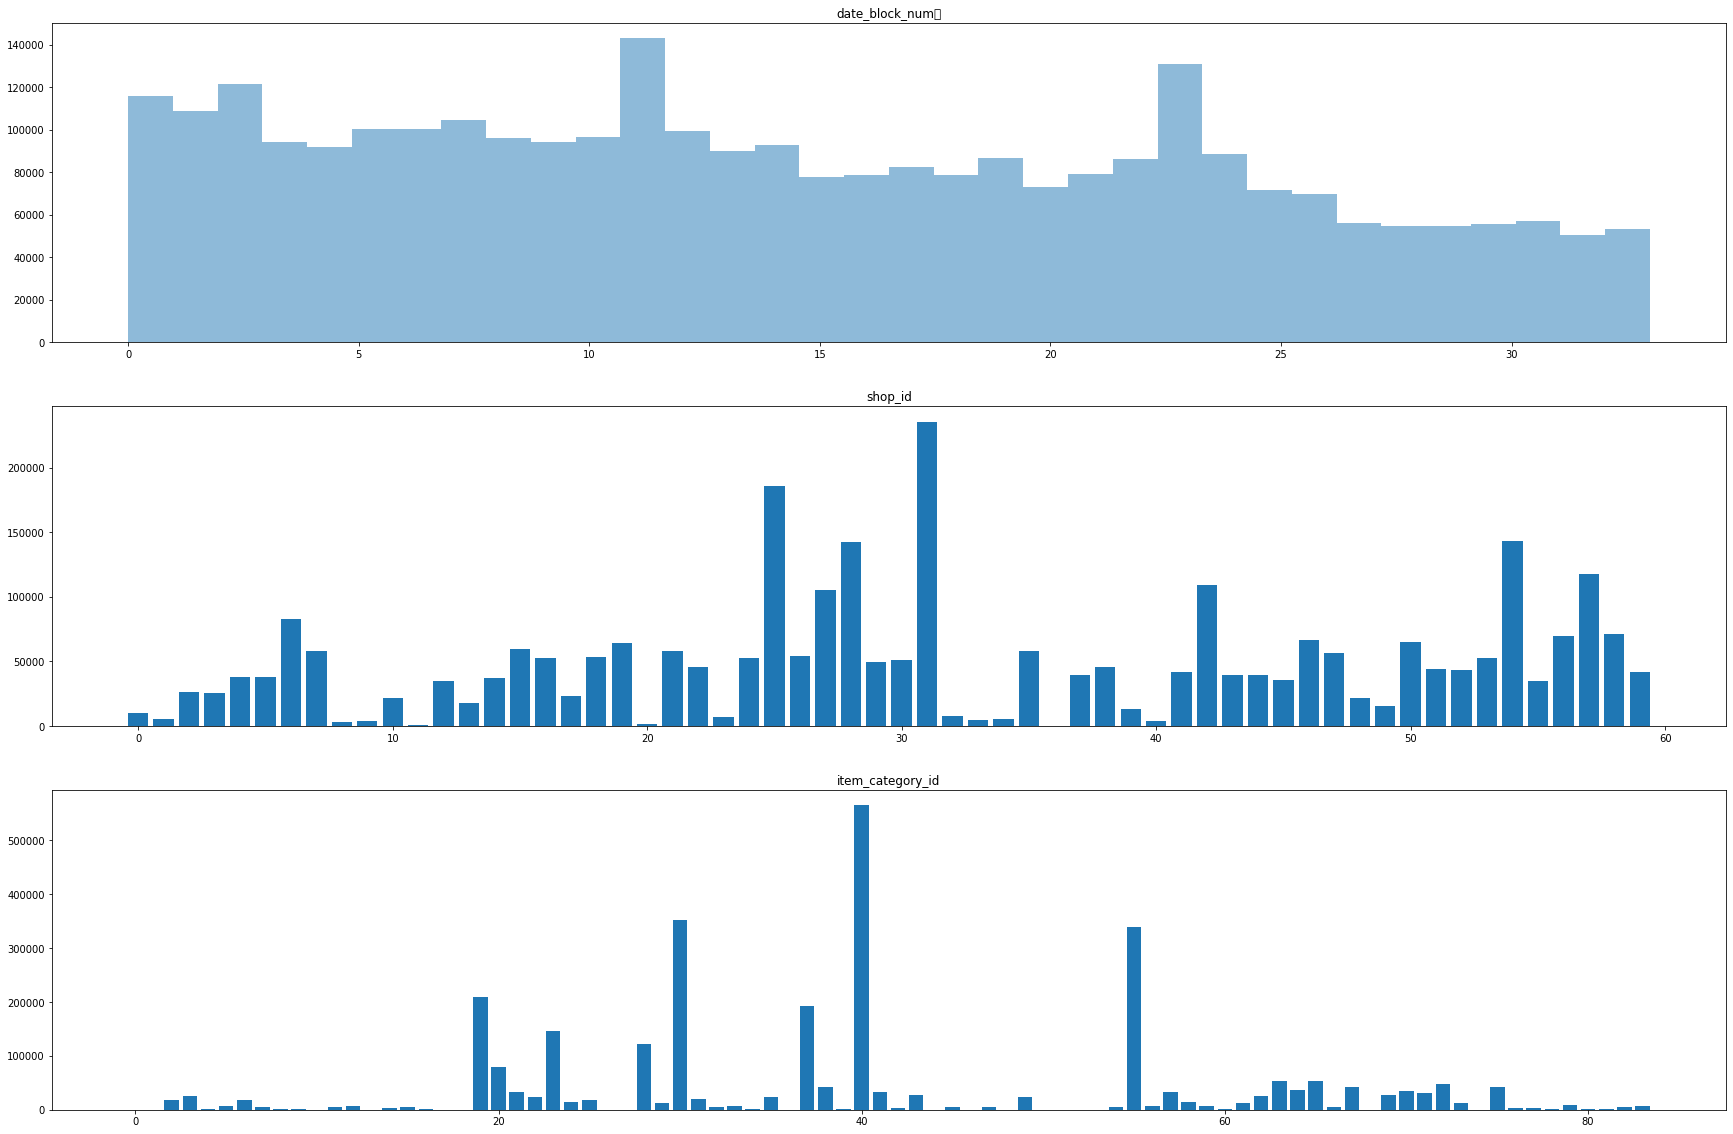

<Figure size 936x216 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3)
plt.figure(figsize=(13, 3))
fig.set_size_inches(30, 20)

axs[0].hist(train_data.iloc[:,1], train_data.iloc[:,1].value_counts().shape[0],  alpha=0.5)
axs[0].title.set_text("date_block_num	")
axs[1].bar(train_data.iloc[:,2].value_counts().keys(),train_data.iloc[:,2].value_counts())
axs[1].title.set_text("shop_id")
axs[2].bar(train_data.iloc[:,8].value_counts().keys(),train_data.iloc[:,8].value_counts())
axs[2].title.set_text("item_category_id")


In [45]:
train_data.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
shop_name             0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64